# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [4]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [5]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'east'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [6]:
def simple_environment(agent, max_steps, verbose = False):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned

Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [7]:
simple_environment(simple_randomized_agent, max_steps = 20)

2

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. Use the same environmnt for all your agent implementations in the tasks below.

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [8]:
# Your code and description goes here

import random

#You can edit the size (assume square), number of dirty squares, max steps, tuple for position, and verboseness
def simple_environment(agent, enviro_size, num_dirty, max_steps, start_pos, verbose):
    num_cleaned = 0

    #Calculate the environment area, random of number squares dirty, and a range to assign values
    envi_area = enviro_size * enviro_size
    dirty_array = random.sample(range(envi_area), num_dirty)
    
    #Create the 2D Array with 'D' for dirty and 'C' for clean squares
    environment = []
    linIndex = 0
    for i in range(enviro_size):
        envi_row = []
        for j in range(enviro_size):
            if linIndex in dirty_array:
                envi_row.append('D')
            else:
                envi_row.append('C')
            linIndex += 1

        environment.append(envi_row)

    'Start with the position given and set default values'
    currX = start_pos[0]
    currY = start_pos[1]
    dirty = False
    bumpers = {"north" : True, "south" : True, "west" : True, "east" : True}

    'For loop for the amount of steps given'
    for steps in range(max_steps):
        #Checks the current location and sets the bumpers to correct values
        #If bumpers at value == False, there is a barrier. If it is True, it can move in that direction
        if currX == 0:
            bumpers["west"] = False
        else:
            bumpers["west"] = True

        if currX == enviro_size - 1:
            bumpers["east"] = False
        else:
            bumpers["east"] = True

        if currY == 0:
            bumpers["north"] = False
        else:
            bumpers["north"] = True

        if currY == enviro_size - 1:
            bumpers["south"] = False
        else:
            bumpers["south"] = True
        
        #Setting environment square state to dirty or clean
        if environment[currX][currY] == 'D':
            dirty = True
        else:
            dirty = False

        # Infinite loop to check the bumpers
        while True:
            action = agent(bumpers, dirty)
            if action == "suck":
                environment[currX][currY] = 'C'
                if dirty == True:
                    num_cleaned = num_cleaned + 1
                break
            if action == "north":
                if currY <= 0:
                    continue
                else:
                    currY -= 1
                    break
            if action == "south":
                if currY >= enviro_size - 1:
                    continue
                else:
                    currY += 1
                    break
            if action == "east":
                if currX >= enviro_size - 1:
                    continue
                else:
                    currX += 1
                    break
            if action == "west":
                if currX <= 0:
                    continue
                else:
                    currX -= 1
                    break
            if action == "ALL CLEAN!":
                return num_cleaned
        
        #Reduce steps
        max_steps = max_steps - 1

        #Add some printing if verbose needed
        if verbose:
            print("Step", steps , "- action:", action) 
            print("Bumper Sensors:", bumpers)
            print("Current Location:", currX, ",", currY)
            print("Current Environment:", environment, '\n')
    if verbose: 
        print("Total Dirty:", num_dirty)
    
    return num_cleaned


## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [9]:
# Your code and description goes here
def simple_reflex_agent(bumpers, dirty):
    #Suck ONLY if dirty
    if(dirty == True):
        return 'suck'
    else:
        #Pick a random direction until it returns true, then move there
        movements = ["north", "east", "west", "south"]
        pick = True
        while pick:
            thisMove = np.random.choice(movements)
            if(bumpers[thisMove] == True):
                return thisMove

#Print the output via the environment   
print("Total Cleaned:", simple_environment(simple_reflex_agent, 10, 10, 50, (0,0), False))

Total Cleaned: 2


## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

#### Your short description of the state and your implementation goes here:
In this case, my state is represented by the variables stored inside the class of the agent. Here, I store whether the robot has been to the origin (0,0), it's current X and Y, and which direction it's heading (whether or not it's going East).

Using this, the agent knows its location and uses that to systematically clean the square room row by row.

In [10]:
# Your code goes here
class model_based_reflex_agent():

    # This is the state. It tracks its current position, whether it has found the origin, and which direction it's currently heading.
    def __init__(self):
        self.isOrigin = False
        self.currX = 0
        self.currY = 0
        self.goEast = True

    # This function moves the robot to the origin (0,0) - the top left corner
    def goToOrigin(self, bumpers):
        if bumpers['north'] == False and bumpers['west'] == False:
            self.isOrigin = True
        else:
            if(bumpers['north'] != False):
                return 'north'
            if(bumpers['west'] != False):
                return 'west'

    # This function defines the action of the robot
    # The robot's cleaning function starts at the origin and cleans row by row, snaking through the square room
    def act(self, bumpers, dirty):

        #If it has not found the origin yet, go to the origin
        if self.isOrigin == False:
            return self.goToOrigin(bumpers)
        else:
            # Clean if the current square is dirty
            if dirty == True:
                return 'suck'

            # If it's at the origin, it must go east to clean the row
            if self.goEast:
                # This is the case where there is an ODD amount of rows and the robot has cleaned everything
                if bumpers['south'] == False and bumpers['east'] == False:
                    return "ALL CLEAN!"
                if bumpers['east'] == True:
                    self.currX += 1
                    self.pastAct = 'east'
                    return 'east'
                # Once the bumper east is False, go down a row and then start to clean westward
                if bumpers['east'] == False:
                    self.currY += 1
                    self.goEast = False
                    self.pastAct = 'south'
                    return 'south'
            # Same logic as the east, but for westward cleaning
            else:
                if bumpers['south'] == False and bumpers['west'] == False:
                    return "ALL CLEAN!"
                if bumpers['west'] == True:
                    self.currX -= 1
                    self.pastAct = 'west'
                    return 'west'
                if bumpers['west'] == False:
                    self.currY += 1
                    self.goEast = True
                    self.pastAct = 'south'
                    return 'south'
             
# Define a testing agent and test the code
agent = model_based_reflex_agent();       
print("Total Cleaned:", simple_environment(agent.act, 5, 7, 25, (2,3), False))

Total Cleaned: 4


## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

In [11]:
# !!! THIS SECTION OF MARKDOWN RUNS ALL 100 TRIALS !!!
import csv

dimensions = [5, 10, 100]

# Number of dirty squares are the dimensions of one side + 2
# Number of steps is the total area of the room
with open('test_simulation_study.csv', 'w', newline='') as file:
    # Output of the chart is in a csv file
    writer = csv.writer(file)
    writer.writerow(["Size", "Randomized Agent", "Simple Reflex Agent", "Model-Based Reflex Agent", "Total Dirty", "Total Steps"])
    
    # Iterates through each dimension and writes into the CSV
    for size in dimensions:
        sizeLabel = str(size) + "x" + str(size)
        totalRandom = 0
        totalSimple = 0
        totalModel = 0

        for i in range(100):
            
            # Scales number of steps and number of dirty squares up depending on size
            # The number of steps will always be a little over the total area of the room
            # The percent of squares dirty is always at 30% of the total amount of squares (rounded up)
            if size == 5:
                numDirty = 8
                numSteps = 30
            if size == 10:
                numDirty = 30
                numSteps = 110
            if size == 100:
                numDirty = 3000
                numSteps = 10100

            # Assigns all agents the same random starting spot for each trial
            randomX = random.randint(0, size - 1)
            randomY = random.randint(0, size - 1)

            totalRandom += simple_environment(simple_randomized_agent, size, numDirty, numSteps, (randomX,randomY), False)
            totalSimple += simple_environment(simple_reflex_agent, size, numDirty, numSteps, (randomX,randomY), False)
            agent = model_based_reflex_agent()
            totalModel += simple_environment(agent.act, size, numDirty, numSteps, (randomX,randomY), False)
        writer.writerow([sizeLabel, int(totalRandom/100), int(totalSimple/100), int(totalModel/100), numDirty, numSteps])

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

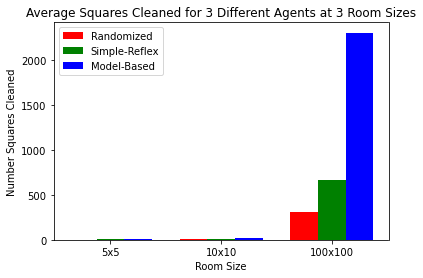

,Size,Randomized Agent,Simple Reflex Agent,Model-Based Reflex Agent,Total Dirty,Total Steps
0,5x5,1,4,6,8,30
1,10x10,4,11,23,30,110
2,100x100,304,665,2304,3000,10100


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

cleaningData = pd.read_csv('/Users/kevinleong/Documents/GitHub/CS7320-AI/Agents/test_simulation_study.csv')

# Inserts data into DataFrame
df = pd.DataFrame(cleaningData)

# Code to print the 3 seperate bar charts as one bar
ind = np.arange(3) 
width = 0.25

randomVals = df['Randomized Agent']
bar1 = plt.bar(ind, randomVals, width, color = 'r')
  
simpleVals = df['Simple Reflex Agent']
bar2 = plt.bar(ind+width, simpleVals, width, color='g')
  
modelVals = df['Model-Based Reflex Agent']
bar3 = plt.bar(ind+width*2, modelVals, width, color = 'b')

plt.xlabel("Room Size")
plt.ylabel('Number Squares Cleaned')
plt.title("Average Squares Cleaned for 3 Different Agents at 3 Room Sizes")
  
plt.xticks(ind+width,['5x5', '10x10', '100x100'])
plt.legend( (bar1, bar2, bar3), ('Randomized', 'Simple-Reflex', 'Model-Based') )
plt.show()

cleaningData.head()

The performance of the 3 agents were quite different as the size of the rooms went up. Again, I scaled the amount of steps and number of dirty squares up depending on the size of the room, and for each trial the starting X and Y values were randomized, so everything was the same for these trials except the agents themselves.

You can see at the 5x5 and 10x10 size, the Randomized agent only cleaned 1 square. As well as this, at the 100x100 level, it only cleaned 10. This is the lowest performing agent, as it cleaned 12.5% of dirty squares in the 5x5 room and 13.3% of dirty squares in the 10x10 room. Because the agent is purely random, it wastes a lot of its energy steps sucking clean squares and moving sporatically around the board. This issue is especially problematic as room size increases and its effectiveness decreases as shown in the 100x100 room where it only cleaned 10%.

However, looking at the Simple Reflex Agent, we get some better results. It managed to clean 37.5% of the squares in the 5x5 and only 36.7% of squares in the 10x10 rooms. When it comes to the 100x100 room, it only could clean 22.2% of the squares. Much like the randomized agent, this agent moves in a random direction, following bumpers. While it has marginally better performance than the randomized agent, it still is not that effective when room size scales upward. 

The best acting agent, by far, is the Model-Based Reflex agent. By snaking around the room, it manages to clean 75% and 76.7% of the dirty squares in the 5x5 and 10x10 rooms. However, unlike the other two agents, this agent's effectiveness manages to clean 77% of the squares in the 100x100 room - making it both the most efficient and the most effective agent out of the three. I think the reason the agent fails to get a complete room is due to its algorithm, it's initial objective is to get to the top left corner - spending energy units that could be spent on cleaning. Therefore, the agent does not clean some portions of the bottomn right part of the room, leaving a certain portion of the room still dirty.

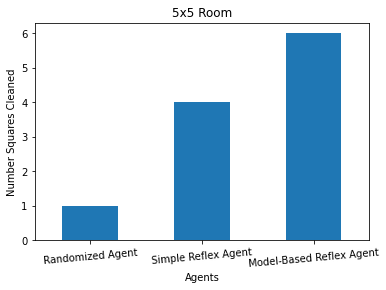

In [13]:
df.iloc[0, 1:4].astype(int).plot(kind="bar", title="5x5 Room")
plt.xlabel('Agents')
plt.ylabel('Number Squares Cleaned')
plt.xticks(rotation = 5)
plt.show()

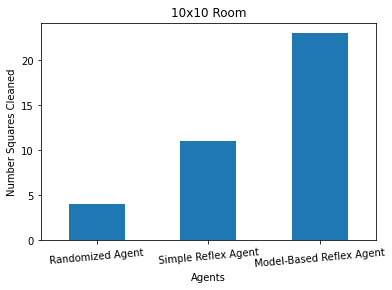

In [14]:
df.iloc[1, 1:4].astype(int).plot(kind="bar", title="10x10 Room")
plt.xlabel('Agents')
plt.ylabel('Number Squares Cleaned')
plt.xticks(rotation = 5)
plt.show()

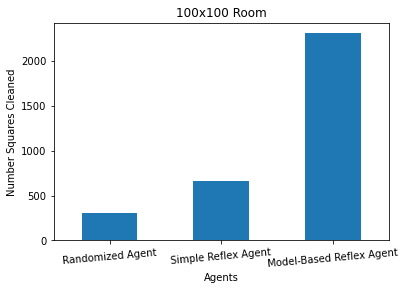

In [15]:
df.iloc[2, 1:4].astype(int).plot(kind="bar", title="100x100 Room")
plt.xlabel('Agents')
plt.ylabel('Number Squares Cleaned')
plt.xticks(rotation = 5)
plt.show()

Above, I separated the data into their specific room sizes in order to show a more in-depth view of the performance of the agents on the different rooms. 

In these plots, you can really see the difference in effectiveness of the different agents. The randomized agent consistently cleaned the least and the model-based reflex agent consistently cleaned the most (with the simple-reflex agent somewhere in between). You can also see, while the length of the bars for the randomized and simple reflex agents change, the model-based reflex agent generally has the same bar height in each room.

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how your agent implementations will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

*If my agent were put into a rectangular room with unknown size...*

The random and simple-reflex agent would perform quite similar, cleaning up a minimal amount of squares. These agents have the probability to move and clean just as well as they did in the square room. However, my model-based reflex agent would be able to adapt and probably clean more squares than the other two agents. This is because the agent does not track the exact number of squares cleaned, but tracks what row it is cleaning. Therefore, it should perform the EXACT SAME as the square room.

*If my agent were to clean in an irregularly shaped area...*

I think that the random and simple-reflex agents would have a harder time cleaning. Because both of them generally move randomly, they would probably have a hard time nacigating through these areas. In a slim hallway, the simple reflex agent would definitely perform better than the random agent. However, in a room that is randomly generated in shape, both random and reflex agents would perform similar as they would with the square room. However, I think that the model-based reflex agent would have the worst reaction to the room change. Because it works assuming the room can be fully cleaned row by row, things like a slim column (where the robot would have to backtrack already cleaned squares) would cause the agent to stop at the end of the hall. As well as this, any extra corners could confuse the agent to thinking it has completed its job, making the program stop. Not only this, since the model-based reflex agent relies on identifying the top left corner of the room, if the top left corner is near another wall or in its own section, the agent would not be able to clean certain sections not in the other sections of the odd-shaped room.

*If the room contained obstacles...*

I think that the random and simple-reflex agents would suffer a little, but generally have a similar performance as they did in the square room as they move with some kind of randomness. I think that the simple reflex would outperform the random agent still, but their separation would be minimal. The model-based reflex agent, however, would greatly have its effectiveness dropped because it relies on its east/west bumpers to identify the edges of the room. So, if it were to hit an obstacle on the left or right of travel, it would assume it hit the edge of the room and move to the next row, eventhough the items after the obstacle could still be dirty. I think that these randomly put obstacles would greatly reduce the effectiveness of the model-based reflex and could probably only clean the top left side effectively.

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

In [28]:
# Your code and discussion goes here

import random

#You can edit the size (assume square), number of dirty squares, max steps, tuple for position, and verboseness
def environment_with_objects(agent, enviro_size, num_dirty, max_steps, start_pos, verbose, num_objs):
    num_cleaned = 0

    #Calculate the environment area, random of number squares dirty, and a range to assign values
    envi_area = enviro_size * enviro_size
    dirty_array = random.sample(range(envi_area), num_dirty)
    object_array = random.sample(range(envi_area), num_objs)
    
    #Create the 2D Array with 'D' for dirty and 'C' for clean squares
    environment = []
    linIndex = 0
    for i in range(enviro_size):
        envi_row = []
        for j in range(enviro_size):
            if linIndex in dirty_array:
                envi_row.append('D')
            elif linIndex in object_array:
                envi_row.append('O')
            else:
                envi_row.append('C')
            linIndex += 1

        environment.append(envi_row)

    'Start with the position given and set default values'
    currX = start_pos[0]
    currY = start_pos[1]
    dirty = False
    bumpers = {"north" : True, "south" : True, "west" : True, "east" : True}

    'For loop for the amount of steps given'
    for steps in range(max_steps):
        #Checks the current location and sets the bumpers to correct values
        #If bumpers at value == False, there is a barrier. If it is True, it can move in that direction

        # For objects
        if currX != 0 and currX != enviro_size - 1:
            if environment[currX - 1][currY] == 'O':
                bumpers["west"] = False
            if environment[currX + 1][currY] == 'O':
                bumpers["east"] = False
        if currY != 0 and currY != enviro_size - 1:
            if environment[currX][currY + 1] == 'O':
                bumpers["north"] = False
            if environment[currX][currY - 1] == 'O': 
                bumpers["south"] = False

        # For edges
        if currX == 0:
            bumpers["west"] = False
        else:
            bumpers["west"] = True

        if currX == enviro_size - 1:
            bumpers["east"] = False
        else:
            bumpers["east"] = True

        if currY == 0:
            bumpers["north"] = False
        else:
            bumpers["north"] = True

        if currY == enviro_size - 1:
            bumpers["south"] = False
        else:
            bumpers["south"] = True
        
        #Setting environment square state to dirty or clean
        if environment[currX][currY] == 'D':
            dirty = True
        else:
            dirty = False

        # Infinite loop to check the bumpers
        while True:
            action = agent(bumpers, dirty)
            if action == "suck":
                environment[currX][currY] = 'C'
                if dirty == True:
                    num_cleaned = num_cleaned + 1
                break
            if action == "north":
                if currY <= 0:
                    continue
                else:
                    currY -= 1
                    break
            if action == "south":
                if currY >= enviro_size - 1:
                    continue
                else:
                    currY += 1
                    break
            if action == "east":
                if currX >= enviro_size - 1:
                    continue
                else:
                    currX += 1
                    break
            if action == "west":
                if currX <= 0:
                    continue
                else:
                    currX -= 1
                    break
            if action == "ALL CLEAN!":
                return num_cleaned
        
        #Reduce steps
        max_steps = max_steps - 1

        #Add some printing if verbose needed
        if verbose:
            print("Step", steps , "- action:", action) 
            print("Bumper Sensors:", bumpers)
            print("Current Location:", currX, ",", currY)
            print("Current Environment:", environment, '\n')
    if verbose: 
        print("Total Dirty:", num_dirty)
    
    return num_cleaned

Step 0 - action: west
Bumper Sensors: {'north': True, 'south': True, 'west': True, 'east': True}
Current Location: 1 , 3
Current Environment: [['O', 'C', 'C', 'C', 'C'], ['D', 'C', 'D', 'D', 'C'], ['D', 'D', 'C', 'O', 'C'], ['D', 'C', 'C', 'D', 'C'], ['O', 'C', 'C', 'C', 'C']] 

Step 1 - action: suck
Bumper Sensors: {'north': True, 'south': True, 'west': True, 'east': True}
Current Location: 1 , 3
Current Environment: [['O', 'C', 'C', 'C', 'C'], ['D', 'C', 'D', 'C', 'C'], ['D', 'D', 'C', 'O', 'C'], ['D', 'C', 'C', 'D', 'C'], ['O', 'C', 'C', 'C', 'C']] 

Step 2 - action: west
Bumper Sensors: {'north': True, 'south': True, 'west': True, 'east': True}
Current Location: 0 , 3
Current Environment: [['O', 'C', 'C', 'C', 'C'], ['D', 'C', 'D', 'C', 'C'], ['D', 'D', 'C', 'O', 'C'], ['D', 'C', 'C', 'D', 'C'], ['O', 'C', 'C', 'C', 'C']] 

Step 3 - action: south
Bumper Sensors: {'north': True, 'south': True, 'west': False, 'east': True}
Current Location: 0 , 4
Current Environment: [['O', 'C', 'C',

In [29]:
# !!! THIS SECTION OF MARKDOWN RUNS ALL 100 TRIALS !!!
import csv

dimensions = [5, 10, 100]

# Number of dirty squares are the dimensions of one side + 2
# Number of steps is the total area of the room
with open('test_simulation_study_with_objects.csv', 'w', newline='') as file:
    # Output of the chart is in a csv file
    writer = csv.writer(file)
    writer.writerow(["Size", "Randomized Agent", "Simple Reflex Agent", "Model-Based Reflex Agent", "Total Dirty", "Total Steps", "Total Objects"])
    
    # Iterates through each dimension and writes into the CSV
    for size in dimensions:
        sizeLabel = str(size) + "x" + str(size)
        totalRandom = 0
        totalSimple = 0
        totalModel = 0

        for i in range(100):
            
            # Scales number of steps and number of dirty squares up depending on size
            # The number of steps will always be a little over the total area of the room
            # The percent of squares dirty is always at 30% of the total amount of squares (rounded up)
            if size == 5:
                numDirty = 8
                numSteps = 30
                numObj = 20
            if size == 10:
                numDirty = 30
                numSteps = 110
                numObj = 100
            if size == 100:
                numDirty = 3000
                numSteps = 10100
                numObj = 10000

            # Assigns all agents the same random starting spot for each trial
            randomX = random.randint(0, size - 1)
            randomY = random.randint(0, size - 1)

            totalRandom += environment_with_objects(simple_randomized_agent, size, numDirty, numSteps, (randomX,randomY), False, numObj)
            totalSimple += environment_with_objects(simple_reflex_agent, size, numDirty, numSteps, (randomX,randomY), False, numObj)
            agent = model_based_reflex_agent()
            totalModel += environment_with_objects(agent.act, size, numDirty, numSteps, (randomX,randomY), False, numObj)
        writer.writerow([sizeLabel, int(totalRandom/100), int(totalSimple/100), int(totalModel/100), numDirty, numSteps, numObj])

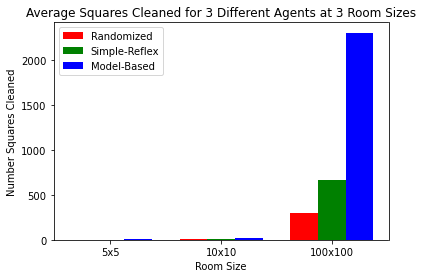

,Size,Randomized Agent,Simple Reflex Agent,Model-Based Reflex Agent,Total Dirty,Total Steps,Total Objects
0,5x5,1,3,6,8,30,20
1,10x10,4,10,23,30,110,100
2,100x100,302,670,2307,3000,10100,10000


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

cleaningData = pd.read_csv('/Users/kevinleong/Documents/GitHub/CS7320-AI/Agents/test_simulation_study_with_objects.csv')

# Inserts data into DataFrame
df = pd.DataFrame(cleaningData)

# Code to print the 3 seperate bar charts as one bar
ind = np.arange(3) 
width = 0.25

randomVals = df['Randomized Agent']
bar1 = plt.bar(ind, randomVals, width, color = 'r')
  
simpleVals = df['Simple Reflex Agent']
bar2 = plt.bar(ind+width, simpleVals, width, color='g')
  
modelVals = df['Model-Based Reflex Agent']
bar3 = plt.bar(ind+width*2, modelVals, width, color = 'b')

plt.xlabel("Room Size")
plt.ylabel('Number Squares Cleaned')
plt.title("Average Squares Cleaned for 3 Different Agents at 3 Room Sizes")
  
plt.xticks(ind+width,['5x5', '10x10', '100x100'])
plt.legend( (bar1, bar2, bar3), ('Randomized', 'Simple-Reflex', 'Model-Based') )
plt.show()

cleaningData.head()

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [31]:
# Your ideas/code